In [1]:
textAnalyticsURL = 'westcentralus.api.cognitive.microsoft.com'
textAnalyticsKey = '15aa85ed1c714915a43671956abbad28'

In [2]:
import urllib.parse, http.client, urllib.request, urllib.error, json

headers = {
    'Content-Type' : 'application/json',
    'Ocp-Apim-Subscription-Key' : textAnalyticsKey,
    'Accept' : 'application/json'
}

body = {
    'documents' : [
        {
            'language' : 'en',
            'id' : '1',
            'text' : 'Wow! I am loving this course so much! It is great!'
        },
        {
            'language' : 'en',
            'id' : '2',
            'text' : 'This course is not working for me right now.'
        },
        {
            'language' : 'en',
            'id' : '3',
            'text' : 'I just saw a movie trailer that blew me away!.'
        }
    ]
}

params = urllib.parse.urlencode({})

try:
    conn = http.client.HTTPSConnection(textAnalyticsURL)
    conn.request("POST", "/text/analytics/v2.0/sentiment?%s" % params, str(body), headers)
    response = conn.getresponse()
    jsonData = response.read().decode("UTF-8")
    data = json.loads(jsonData)
    print('Sentiment goes from 0 to 1, where 0 is super negative and 1 is super positive.')
    print('')
    for document in data['documents']:
        print (document)
        sentiment = "positive"
        if document['score'] <= 0.5:
           sentiment = "negative"
        print('Document ' + document['id'] + ' has a ' + str(document['score']) + '/1.00 sentiment'+ ' ---  ')
        
    conn.close()
except Exception as ex:
    print(ex.strerror)

Sentiment goes from 0 to 1, where 0 is super negative and 1 is super positive.

{'id': '1', 'score': 0.9866831302642822}
Document 1 has a 0.9866831302642822/1.00 sentiment ---  
{'id': '2', 'score': 0.029212385416030884}
Document 2 has a 0.029212385416030884/1.00 sentiment ---  
{'id': '3', 'score': 0.5}
Document 3 has a 0.5/1.00 sentiment ---  


In [3]:
try:
    conn = http.client.HTTPSConnection(textAnalyticsURL)
    conn.request("POST", "/text/analytics/v2.0/keyPhrases?%s" % params, str(body), headers)
    response = conn.getresponse()
    jsonData = response.read().decode("UTF-8")
    data = json.loads(jsonData)
    for document in data['documents']:
        print('Document ' + document['id'] + ' has these key phrases:')
        for phrase in document['keyPhrases']:
            print("    " + phrase)
        print('-----------------------------------')
    conn.close()
except Exception as ex:
    print(ex.strerror)

Document 1 has these key phrases:
    Wow
    course
-----------------------------------
Document 2 has these key phrases:
    course
-----------------------------------
Document 3 has these key phrases:
    movie trailer
-----------------------------------


In [4]:
!curl https://www.unisi.it/sites/default/files/speech.txt -o speech.txt
document = open("speech.txt", "r")

mlk_speech = document.read()
print(mlk_speech)

And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream.
 
I have a dream that one day this nation will rise up and live out the true meaning of its creed:
 
We hold these truths to be self-evident, that all men are created equal.
 
I have a dream that one day on the red hills of Georgia, the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood.
 
I have a dream that one day even the state of Mississippi, a state sweltering with the heat of injustice, sweltering with the heat of oppression, will be transformed into an oasis of freedom and justice.
 
I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character.
 
I have a dream today!
 
I have a dream that one day, down in Alabama, with its vicious racists, with its governor having h

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  3349    0  3349    0     0   1251      0 --:--:--  0:00:02 --:--:--  1251
100  3349    0  3349    0     0   1251      0 --:--:--  0:00:02 --:--:--  1251


In [5]:
from string import punctuation

# remove numbers
mlk_speech = ''.join(c for c in mlk_speech if not c.isdigit())

# remove punctuation and make lower case
mlk_speech = ''.join(c for c in mlk_speech if c not in punctuation).lower()

print(mlk_speech)

and so even though we face the difficulties of today and tomorrow i still have a dream it is a dream deeply rooted in the american dream
 
i have a dream that one day this nation will rise up and live out the true meaning of its creed
 
we hold these truths to be selfevident that all men are created equal
 
i have a dream that one day on the red hills of georgia the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood
 
i have a dream that one day even the state of mississippi a state sweltering with the heat of injustice sweltering with the heat of oppression will be transformed into an oasis of freedom and justice
 
i have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character
 
i have a dream today
 
i have a dream that one day down in alabama with its vicious racists with its governor having his lips dripping w

In [6]:
#remove stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

mlk_speech = ' '.join([word for word in mlk_speech.split() if word not in (stopwords.words('english'))])

print(mlk_speech)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


even though face difficulties today tomorrow still dream dream deeply rooted american dream dream one day nation rise live true meaning creed hold truths selfevident men created equal dream one day red hills georgia sons former slaves sons former slave owners able sit together table brotherhood dream one day even state mississippi state sweltering heat injustice sweltering heat oppression transformed oasis freedom justice dream four little children one day live nation judged color skin content character dream today dream one day alabama vicious racists governor lips dripping words interposition nullification one day right alabama little black boys black girls able join hands little white boys white girls sisters brothers dream today dream one day every valley shall exalted every hill mountain shall made low rough places made plain crooked places made straight glory lord shall revealed flesh shall see together hope faith go back south faith able hew mountain despair stone hope faith abl

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
import pandas as pd
nltk.download("punkt")

ps = PorterStemmer()
words = nltk.tokenize.word_tokenize(mlk_speech)
stems = [ps.stem(word) for word in words] 

fd = FreqDist(stems)
fd_df = pd.DataFrame(fd, index=[0]).T 

print(fd_df)

            0
even        2
though      1
face        1
difficulti  1
today       3
...        ..
negro       1
spiritu     1
last        3
thank       1
almighti    1

[162 rows x 1 columns]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


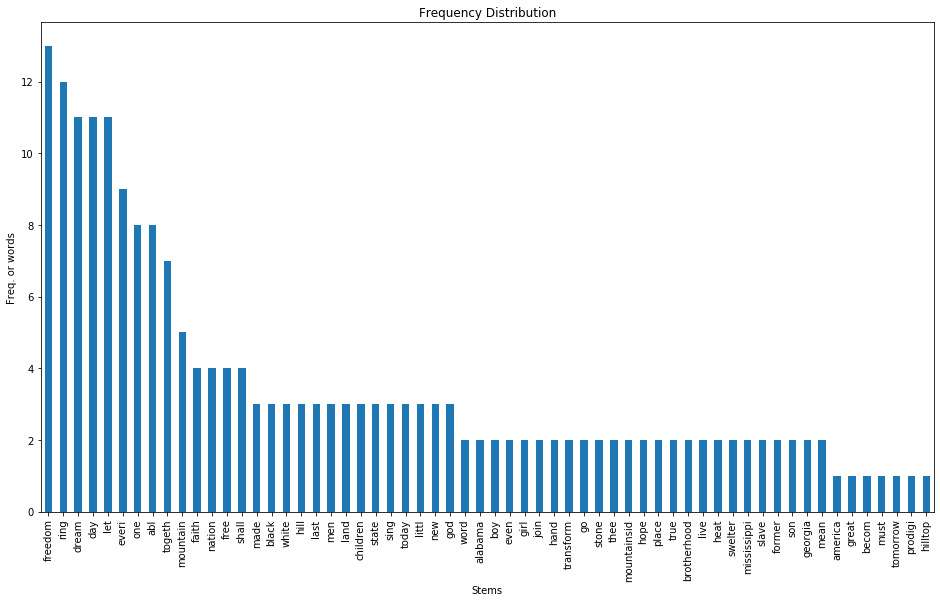

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

counts = fd_df.sort_values(0, ascending = False)
ar = plt.figure(figsize=(16,9))
ax = ar.gca()
counts[0][:60].plot(kind='bar', ax=ax)
ax.set_title("Frequency Distribution")
ax.set_ylabel("Freq. or words")
ax.set_xlabel("Stems")
plt.show()